<font size=5> In this example we are presented with car sales data, from which we intend to estimate the probability of success in a given sale. </font>

# Getting and refining data

In [1]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
data['age'] = 2022 - data['model_year']
data = data.drop(['model_year'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)


*Here we are replacing: "yes"=1 and "no"=0*

In [3]:
for x in data.index:
  if (data.sold[x] == "yes"):
    data.sold[x] = 1
  else:
    data.sold[x] = 0

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_6672\4245684757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sold[x] = 1
C:\Users\kaiqu\AppData\Local\Temp\ipykernel_6672\4245684757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sold[x] = 0


In [4]:
data.head()

,mileage_per_year,price,sold,age
0,21801,30941.02,1,22
1,7843,40557.96,1,24
2,7109,89627.50,0,16
3,26823,95276.14,0,7
4,7935,117384.68,1,8


# Some graphs

In [5]:
import seaborn as sns

<AxesSubplot: xlabel='price', ylabel='age'>

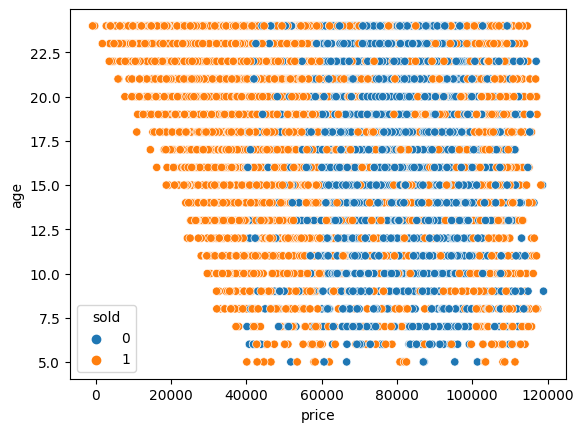

In [6]:
sns.scatterplot(data=data, x= data.price, y=data.age, hue=data.sold)

<AxesSubplot: xlabel='age', ylabel='Count'>

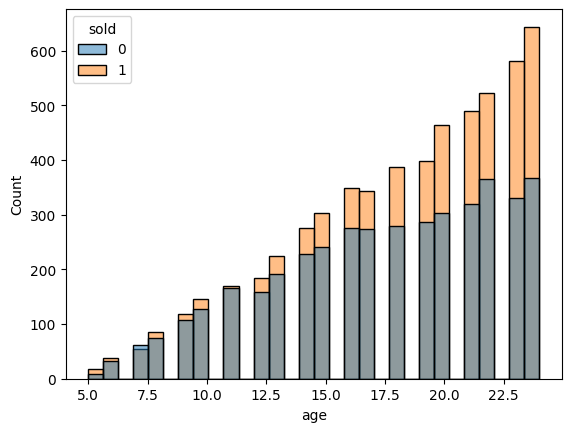

In [7]:
sns.histplot(data=data, x=data.age, hue=data.sold)

<AxesSubplot: xlabel='price', ylabel='Count'>

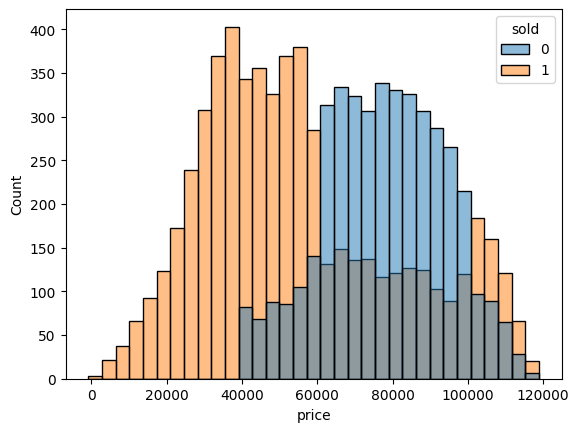

In [8]:
sns.histplot(data=data, x=data.price, hue=data.sold)

<AxesSubplot: xlabel='mileage_per_year', ylabel='Count'>

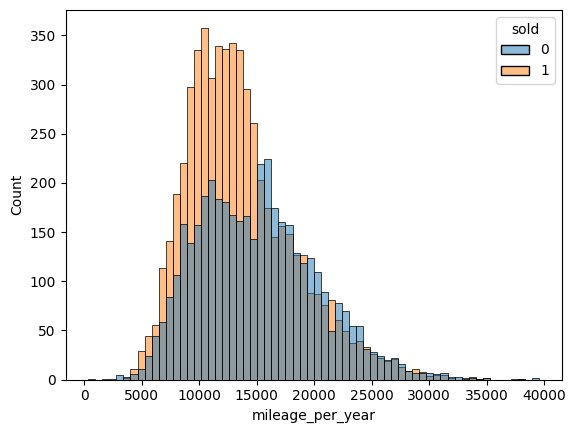

In [9]:
sns.histplot(data=data, x=data.mileage_per_year, hue=data.sold)

# Fitting our data to a model and estimating it's accuracy

In [10]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [11]:
test_data = data[["mileage_per_year", "age", "price"]]
data.sold = data.sold.astype('int')

In [12]:
score_array = []
for i in range(5):
  x_train, x_test, y_train, y_test = train_test_split(test_data, data.sold, test_size = 0.33, stratify=data.sold, random_state=i)

  model = svm.SVC()
  model.fit(x_train, y_train)

  predicted = model.predict(x_test)
  predicted = predicted.reshape(-1,1)

  score = accuracy_score(y_test, predicted) * 100
  score_array.append(score)


In [13]:
import statistics
print('We have an estimated mean accuracy of %.2f%%' % score)


We have an estimated mean accuracy of 77.24%


# Saving our model to a file

In [15]:
import pickle
filename = 'car_sales_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Loading Model

In [16]:
import pickle
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [17]:
filename = 'car_sales_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7724242424242425


# <font size=7> Test your sale estimated result.</font>

<font size=4>Please type below your sale's data:</font>

In [95]:
price = input('Price: '+'$')
age = input('Age: ')
mileage = input('Mileage: ')

my_sale_data = {'mileage_per_year':[mileage], 'age':[age], 'price':[price]}
new_prediction = pd.DataFrame(data = my_sale_data)
new_predition = new_prediction.reset_index()

print('')
if (loaded_model.predict(new_prediction) == [1]):
    print('Your car will probabily sell :)')
else:
    print('Your car probabily will NOT sell :(')


Your car probabily will NOT sell :(
